In [2]:
import os
import json

import zipfile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from wordcloud import WordCloud
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [3]:
import sys
# Space problem handle karne ke liye Quotes ("") zaroori hain
!"{sys.executable}" -m pip install nltk


[notice] A new release of pip is available: 25.1 -> 26.0
[notice] To update, run: C:\Users\SUHANI AGGHI\AppData\Local\Programs\Python\Python313\python.exe -m pip install --upgrade pip


In [3]:
import sys
# Quotes lagane se space wali problem solve ho jayegi
!"{sys.executable}" -m pip install wordcloud


[notice] A new release of pip is available: 25.1 -> 26.0
[notice] To update, run: C:\Users\SUHANI AGGHI\AppData\Local\Programs\Python\Python313\python.exe -m pip install --upgrade pip


In [4]:
df=pd.read_csv("spotify_millsongdata.csv")
df

,artist,song,link,text
0,ABBA,Ahe's My Kind Of Girl,/a/abba/ahes+my+kind+of+girl_20598417.html,"Look at her face, it's a wonderful face \r\nA..."
1,ABBA,"Andante, Andante",/a/abba/andante+andante_20002708.html,"Take it easy with me, please \r\nTouch me gen..."
2,ABBA,As Good As New,/a/abba/as+good+as+new_20003033.html,I'll never know why I had to go \r\nWhy I had...
3,ABBA,Bang,/a/abba/bang_20598415.html,Making somebody happy is a question of give an...
4,ABBA,Bang-A-Boomerang,/a/abba/bang+a+boomerang_20002668.html,Making somebody happy is a question of give an...
...,...,...,...,...
57645,Ziggy Marley,Good Old Days,/z/ziggy+marley/good+old+days_10198588.html,Irie days come on play \r\nLet the angels fly...
57646,Ziggy Marley,Hand To Mouth,/z/ziggy+marley/hand+to+mouth_20531167.html,Power to the workers \r\nMore power \r\nPowe...
57647,Zwan,Come With Me,/z/zwan/come+with+me_20148981.html,all you need \r\nis something i'll believe \...
57648,Zwan,Desire,/z/zwan/desire_20148986.html,northern star \r\nam i frightened \r\nwhere ...


In [5]:
df.shape

(57650, 4)

In [6]:
df.head()

,artist,song,link,text
0,ABBA,Ahe's My Kind Of Girl,/a/abba/ahes+my+kind+of+girl_20598417.html,"Look at her face, it's a wonderful face \r\nA..."
1,ABBA,"Andante, Andante",/a/abba/andante+andante_20002708.html,"Take it easy with me, please \r\nTouch me gen..."
2,ABBA,As Good As New,/a/abba/as+good+as+new_20003033.html,I'll never know why I had to go \r\nWhy I had...
3,ABBA,Bang,/a/abba/bang_20598415.html,Making somebody happy is a question of give an...
4,ABBA,Bang-A-Boomerang,/a/abba/bang+a+boomerang_20002668.html,Making somebody happy is a question of give an...


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57650 entries, 0 to 57649
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   artist  57650 non-null  object
 1   song    57650 non-null  object
 2   link    57650 non-null  object
 3   text    57650 non-null  object
dtypes: object(4)
memory usage: 1.8+ MB


In [8]:
df.isnull().sum()

artist    0
song      0
link      0
text      0
dtype: int64

In [9]:
#top artists
top_artists=df["artist"].value_counts().head(10)
top_artists

artist
Donna Summer        191
Gordon Lightfoot    189
Bob Dylan           188
George Strait       188
Loretta Lynn        187
Alabama             187
Cher                187
Reba Mcentire       187
Chaka Khan          186
Dean Martin         186
Name: count, dtype: int64

In [10]:
df=df.sample(10000)
df=df.drop('link',axis=1).reset_index(drop=True) 

In [11]:
all_lyrics=" ".join(df["text"].dropna()) #converting it in single string as python dont take list 
#creating word cloud : its checks more frquenty used words jo word more time bigger in size
wordcloud=WordCloud(width=800,height=400,background_color="white").generate(all_lyrics) #this is generate a wordcloud 


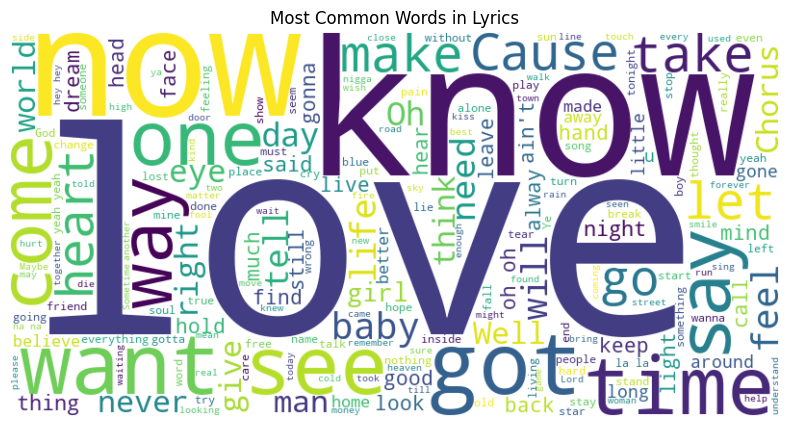

In [12]:
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')  #when need to show a image 
plt.axis("off")
plt.title("Most Common Words in Lyrics")
plt.show()



In [13]:
#nltk that is natural language toolkit it is used to process human language so computer can understand and analyse 
# so it basically clean the data. nltk me zyada nhi hota uske andar ke libraries humme ese downlaod karni hoti hai for specific functioning
nltk.download('punkt') #it is used to break sentences in words para into sentences 
nltk.download('punkt_tab') #punkt sath additional taaki errors na aaye 
nltk.download('stopwords') # faltu words jo grammitical hote hai but analyse ke time kisse kam ke nahi hote unhe remove karna (the is an a where ese words )

[nltk_data] Downloading package punkt to C:\Users\SUHANI
[nltk_data]     AGGHI\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to C:\Users\SUHANI
[nltk_data]     AGGHI\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\SUHANI
[nltk_data]     AGGHI\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [14]:
stop_words=set(stopwords.words('english')) #list de raha hai english ke stopwords ka  


In [15]:
#lyrics jiske hisab se humme recommend karenge unhe process kara hai upar bus import kari h libraries 
def preprocessed_text(text):
    text=re.sub("[^a-zA-Z\s]","",text) #remove everything from text
    text=text.lower()
    tokens=word_tokenize(text) #converts sentence ko words ke list me 
    tokens=[word for word in tokens if word not in stop_words] #stop words hatane ke liye phele word_tokenize use karke words me converts karna hota hai and stop_words me humne stop words daal diye the 
    return " ".join(tokens)
    
    
    
    

<>:3: SyntaxWarning: invalid escape sequence '\s'
<>:3: SyntaxWarning: invalid escape sequence '\s'
C:\Users\SUHANI AGGHI\AppData\Local\Temp\ipykernel_22176\936487567.py:3: SyntaxWarning: invalid escape sequence '\s'
  text=re.sub("[^a-zA-Z\s]","",text) #remove everything from text


In [16]:
df["processed_text"]=df["text"].apply(preprocessed_text)

In [17]:
df.head()

,artist,song,text,processed_text
0,Jimmy Buffett,Havana Daydreamin',"Stashed his trash in Ecuador, bought a good su...",stashed trash ecuador bought good suit clothes...
1,Lloyd Cole,Missing,(She moves on) \r\nTaking with her when she's...,moves taking shes gone jacket jeans shirt bett...
2,Glee,It's All Coming Back To Me Now,There were nights when the wind was so cold \...,nights wind cold body froze bed listened right...
3,Queens Of The Stone Age,The Bronze,I been waiting \r\nWaiting under things that ...,waiting waiting things rise morning holding ho...
4,Kirk Franklin,Movin On,Trouble all around (pressing me) \r\nPeople a...,trouble around pressing people around stressin...


In [18]:
tfidf_vectorizer=TfidfVectorizer(max_features=5000) #tfdif count karna hai smartly ke wo count ke importance bhi dekho data me and tavhi save karo usse sa
tfidf_matrix=tfidf_vectorizer.fit_transform(df["processed_text"])

                                   

in short wo ganne ke words ke becche ke count vector ka angle dekhega wo kam hai to wo ganne similar honge kyuki unke words ka angle kam hai? x axis me ganna and y me count fir words ka angle dekhenge jin do words ka angle kam hoga to unke ganno ko dekha and wo similar songs dedega 

Bilkul sahi pakda hai:

Count/Weight: TF-IDF har word ko ek value (weight) deta hai.

Vector: In values se har gaane ki ek "disah" (direction) banti hai.

Angle: Agar do gaano ke words milte-julte hain, toh unke arrows (vectors) ke beech ka angle bahut kam hoga.

Similarity: Jitna kam angle, utne zyada similar gaane.

Isi ko technical bhasha mein "High Cosine Similarity" kehte hain.  
cosine similarity angle yaani direction dekhti  hai 2 words ke kitne pass pass hai rather than magnitude ke kitn ebaar aaya wo word

2. Cosine Similarity kya-kya karti hai?
Jab aap cosine_similarity(tfidf_matrix, tfidf_matrix) likhti hain, toh wo parde ke peeche ye dono kaam karti hai:

Angle Nikalna: Har gaane ke vector ka dusre gaane ke vector ke saath angle check karti hai.

Compare Karna: Wo har gaane ko (Row-wise) uthati hai aur baaki saare gaano ke saath uska similarity score (0 se 1 ke beech) nikal deti hai.

3. Comparison ka Result (The Matrix)
Aapne jo cosine_sim variable banaya hai, wo koi ek number nahi hai. Wo ek poori table (Matrix) hai. Us table mein har gaane ka har dusre gaane ke saath comparison record hai.

In [19]:
cosine_mat=cosine_similarity(tfidf_matrix , tfidf_matrix)
#angle nikal liya tfidf_matrix ka uske ke sath walo sath   
#ek matrix hai har song ka ek ke sath diya ha i score humme usme 
#ek list hai like har song ke sath baaki songs ke 0 to 1 simlaity ke without knowing konse song ke liye hai points uske liye we use enumerate 

In [20]:
def recommendsongs(song_name,df=df,cosine_mat=cosine_mat,top_n=5):
    idx=df[df["song"].str.lower()== song_name.lower()].index
    if len(idx)==0:
        return "Song Not found in database"
    #in case song found and we ger idx value [45] but ab pandas bus index lsit ke formatme detehai but aage process karne ke liye we need number so 
    #for that humme ke array ke 0 index par store karna hoga ye 45 value soo hume idx ka he array banaya and uske 0 idx par idx ke value that is 45 
    #save kar de hum chahe to idx array ke jagah koi aur array ka name bhi rakh skte hai 


    # Haan, bilkul sahi pakda aapne! Pandas jab bhi kisi condition ke basis par index nikaalta hai, toh wo humein hamesha ek "Index Object" deta hai,
    # jo behavior mein ek list jaisa hi hota hai.
    idx = idx[0] 
    
    #idx=arr[0] bhi likh skte hai now idx is a number rather than a list 

    sim_score=list(enumerate(cosine_mat[idx]))  #Aapke paas cosine_sim[45] mein sirf scores ki line thi: [0.12, 0.45, 0.02, 1.0, ...]
# Jab aapne enumerate lagaya, toh usne har score ko ek Roll Number (Index) de diya:
# (0, 0.12) -> Song index 0 ka score with song entered by user 
# (1, 0.45) -> Song index 1 ka score
# (2, 0.02) -> Song index 2 ka score   enumerate row nikal detaa hai specific uss index par ke and uske points sath then uske index ke 

    sim_score=sorted(sim_score , key=lambda x:x[1],reverse=True) #key=lambda x: x[1]: This is the "brain" of the operation. 
#It tells Python: "Don't sort by the index (the first item); look at the second item (the similarity score at index 1) to decide the order."
    sim_score=sim_score[1:top_n+1]  #0 par to jo user ne choose kara hai uska he sim_score hoga


    #similar songs name
    song_identities=[i[0] for i in sim_score] #row number
    return df[['artist','song']].iloc[song_identities]



    

WHY WRTING TOP 5 IN FUNCTION 
1. Ek "Standard" Set Karna
Sochiye agar aap top_n=5 function mein nahi likhti, toh har baar jab aap koi gaana search karti, aapko computer ko batana padta ki kitne results chahiye.

Ab: Sirf recommend_songs("Song A") likhne par 5 gaane mil jayenge.

Fayda: Ye user ke liye kaam aasaan kar deta hai. 5 ek "Standard" number mana jata hai recommendation ke liye.

to hum cosine=cosine and df=df likh dete hai kyuki function par saara kam hoga model ka training ka to incase kuch error na aaye to backup ke liye likh diya ke kahi upar typing error ho model ko mile na wo sab function ke andar jo likha hai to better hai function ko jo bhi chahiye usse likh do parameters ke sath he  ?


In [21]:
df["song"][2]

"It's All Coming Back To Me Now"

In [22]:
recommendations=recommendsongs("Happiness Is A Warm Gun")
recommendations

'Song Not found in database'

In [23]:
recommendations=recommendsongs("love me like you do")
recommendations


,artist,song
8211,Yoko Ono,My Man
3918,Don Moen,Dwelling Place
6016,Red Hot Chili Peppers,Love Trilogy
1269,The Monkees,Love To Love
5487,Alabama,Love Remains


In [28]:

import pickle
# 'df' wo dataframe hai jisme songs hain
pickle.dump(df, open('music_list.pkl', 'wb')) 
pickle.dump(cosine_mat, open('similarity.pkl', 'wb'))